In [1]:
import cs_vqe_classes.cs_vqe_circuit as cs_circ
import utils.cs_vqe_tools as cs_tools
import utils.plotting_tools as plot
import utils.circuit_execution_tools as ce
from utils.molecule_tools import get_molecule
from matplotlib import pyplot as plt
import json
from qiskit import IBMQ

with open('data/model_data.json', 'r') as json_file:
    model_data = json.load(json_file)
     
species = list(model_data.keys())
species

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


['H2_3-21G_SINGLET',
 'H6_STO-3G_SINGLET',
 'H2_6-31G_SINGLET',
 'H2_6-311G_SINGLET',
 'H3+_STO-3G_SINGLET',
 'H3+_3-21G_SINGLET',
 'H3+_STO-3G_SINGLET_alt',
 'HeH+_3-21G_SINGLET',
 'HeH+_3-21G_SINGLET_alt',
 'HeH+_6-311G_SINGLET',
 'H2O_STO-3G_SINGLET',
 'H2O_STO-3G_SINGLET_alt',
 'BeH+_STO-3G_SINGLET',
 'LiH_STO-3G_SINGLET',
 'CH+_STO-3G_SINGLET',
 'HF_STO-3G_SINGLET',
 'B+_STO-3G_SINGLET',
 'N+_STO-3G_SINGLET',
 'OH+_STO-3G_SINGLET',
 'CH2_STO-3G_SINGLET',
 'BeH2_STO-3G_SINGLET',
 'Be_STO-3G_SINGLET',
 'C_STO-3G_SINGLET',
 'NH_STO-3G_SINGLET',
 'F+_STO-3G_SINGLET',
 'Li+_STO-3G_SINGLET',
 'BH_STO-3G_SINGLET',
 'NeH+_STO-3G_SINGLET',
 'NH2+_STO-3G_SINGLET',
 'BH2+_STO-3G_SINGLET']

In [5]:
test_data = [s for s in species if s.find('alt')==-1]
test_data[7:]

['HeH+_6-311G_SINGLET',
 'H2O_STO-3G_SINGLET',
 'BeH+_STO-3G_SINGLET',
 'LiH_STO-3G_SINGLET',
 'CH+_STO-3G_SINGLET',
 'HF_STO-3G_SINGLET',
 'B+_STO-3G_SINGLET',
 'N+_STO-3G_SINGLET',
 'OH+_STO-3G_SINGLET',
 'CH2_STO-3G_SINGLET',
 'BeH2_STO-3G_SINGLET',
 'Be_STO-3G_SINGLET',
 'C_STO-3G_SINGLET',
 'NH_STO-3G_SINGLET',
 'F+_STO-3G_SINGLET',
 'Li+_STO-3G_SINGLET',
 'BH_STO-3G_SINGLET',
 'NeH+_STO-3G_SINGLET',
 'NH2+_STO-3G_SINGLET',
 'BH2+_STO-3G_SINGLET']

In [6]:
anz_data

{'H2_3-21G_SINGLET': {'num_qubits': 5,
  'num_terms': {'full': 64},
  'circdepth': {'full': 864},
  'chemaccnum': 5,
  'errors': [0.025078119403493027,
   0.017879349420083734,
   0.013774504110485974,
   0.004963143300049655,
   0.004889530285967281,
   2.6645352591003757e-15]},
 'H6_STO-3G_SINGLET': {'num_qubits': 9,
  'num_terms': {'full': 644},
  'circdepth': {'full': 14851},
  'chemaccnum': 9,
  'errors': [0.10053406592604075,
   0.08182136101890691,
   0.07895269198719035,
   0.07847041597662185,
   0.06575978674591498,
   0.06439429318343315,
   0.041941000495422376,
   0.03061852389112074,
   0.02010210385509925,
   5.773159728050814e-15]},
 'H2_6-31G_SINGLET': {'num_qubits': 5,
  'num_terms': {'full': 48},
  'circdepth': {'full': 656},
  'chemaccnum': 5,
  'errors': [0.025138963626292643,
   0.0192825502825138,
   0.015048333688592708,
   0.005080849221907213,
   0.004997706290491344,
   -1.1102230246251565e-15]},
 'H2_6-311G_SINGLET': {'num_qubits': 9,
  'num_terms': {'full':

In [7]:
#anz_data = {}
for speciesname in test_data[7:]:

    molecule    = model_data[speciesname]
    ham         = molecule['ham']
    uccsd       = molecule['uccsd']
    hf_config   = molecule['hf_config']
    num_qubits  = molecule['num_qubits']
    terms_noncon= molecule['terms_noncon']

    mol_circ = cs_circ.cs_vqe_circuit(hamiltonian =ham,
                                      terms_noncon=terms_noncon,
                                      num_qubits  =num_qubits, 
                                      hf_config   =hf_config)
    
    anz_data[speciesname] = {'num_qubits':num_qubits, 
                             'num_terms': {'full':len(uccsd)},
                             'circdepth': {'full':mol_circ.full_uccsd(uccsd).depth()},
                             'chemaccnum':mol_circ.chem_acc_num_q,
                             'errors':    mol_circ.cs_vqe_errors,
                             #'csvqedata':{"true_gs":mol_circ.true_gs}
                            }
    
    print(speciesname, mol_circ.num_qubits, mol_circ.chem_acc_num_q)
    
    if mol_circ.chem_acc_num_q != mol_circ.num_qubits:
        for num_sim_q in range(1, mol_circ.chem_acc_num_q+1):
            #ham_red = mol_circ.ham_reduced[num_sim_q]
            qc = mol_circ.build_circuit(uccsd, num_sim_q)
            #cs_vqe_result = ce.remote_VQE(ham_red, qc, mol_circ.init_params)
            #cs_vqe_result = mol_circ.CS_VQE(anz_terms=uccsd, num_sim_q=num_sim_q)
            anz_data[speciesname]['num_terms'][num_sim_q] = len(mol_circ.project_anz_terms_alt(uccsd, num_sim_q))
            anz_data[speciesname]['circdepth'][num_sim_q] = qc.depth()
            #anz_data[speciesname]['csvqedata'][num_sim_q] = cs_vqe_result


HeH+_6-311G_SINGLET 10 9
H2O_STO-3G_SINGLET 10 7
BeH+_STO-3G_SINGLET 8 6
LiH_STO-3G_SINGLET 8 4
CH+_STO-3G_SINGLET 8 6
HF_STO-3G_SINGLET 8 4
B+_STO-3G_SINGLET 5 3
N+_STO-3G_SINGLET 5 0
OH+_STO-3G_SINGLET 8 5
CH2_STO-3G_SINGLET 10 8
BeH2_STO-3G_SINGLET 9 7
Be_STO-3G_SINGLET 5 3
C_STO-3G_SINGLET 5 4
NH_STO-3G_SINGLET 8 6
F+_STO-3G_SINGLET 5 0
Li+_STO-3G_SINGLET 5 0
BH_STO-3G_SINGLET 8 6
NeH+_STO-3G_SINGLET 8 0
NH2+_STO-3G_SINGLET 10 8
BH2+_STO-3G_SINGLET 10 8


In [8]:
import json 

data={}
for k in anz_data.keys():
    data[str(k)] = anz_data[k]

with open("data/anz_circ_depth.json", "w") as outfile: 
    json.dump(data, outfile)

In [10]:
new_anz_data = {mol:anz_data[mol] for mol in anz_data if (anz_data[mol]['num_qubits']!=anz_data[mol]['chemaccnum'] and not anz_data[mol]['chemaccnum']==0) and mol.find('alt')==-1}

In [11]:
[mol for mol in anz_data if mol not in new_anz_data]

['H2_3-21G_SINGLET',
 'H6_STO-3G_SINGLET',
 'H2_6-31G_SINGLET',
 'H2_6-311G_SINGLET',
 'H3+_STO-3G_SINGLET',
 'H3+_3-21G_SINGLET',
 'HeH+_3-21G_SINGLET',
 'N+_STO-3G_SINGLET',
 'F+_STO-3G_SINGLET',
 'Li+_STO-3G_SINGLET',
 'NeH+_STO-3G_SINGLET']

Text(0.5, 0, 'Proportion of qubits simulated (relative to full system)')

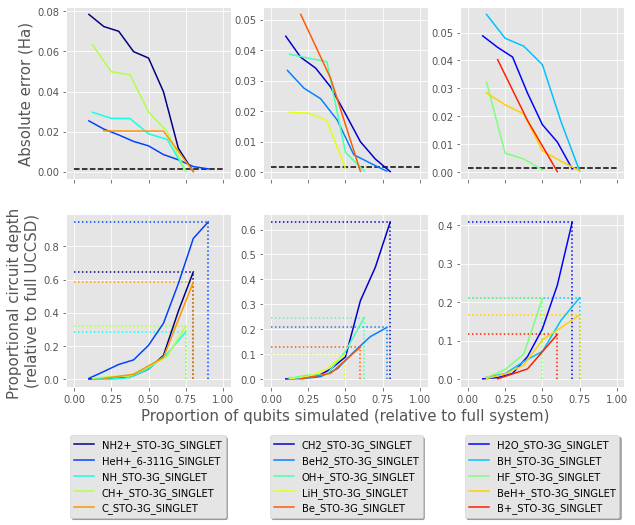

In [34]:
anz_data_sorted = sorted(new_anz_data, key=lambda x:new_anz_data[x]['num_qubits'])
anz_data_sorted.reverse()
#print(anz_data_sorted)

fig, axes = plt.subplots(nrows=2, 
                         ncols=3, 
                         figsize = (10, 7), 
                         sharex=True,
                         gridspec_kw={'height_ratios': [1, 1]})
max_qubits = {}

for i, speciesname in enumerate(anz_data_sorted[1:]):
    c = plt.cm.jet(i/len(new_anz_data))
    #if i <=int(len(new_anz_data)/3)-1:
    #    index = 2
    #elif i <=2*int(len(new_anz_data)/3)-1:
    #    index = 1
    #else:
    #    index = 0
           
    index = i%3
            
    data = new_anz_data[speciesname]
    ca = data['chemaccnum']
    
    if index in max_qubits:
        if max_qubits[index] < data['chemaccnum']:
            max_qubits[index] = data['chemaccnum']
    else:
        max_qubits[index] = data['chemaccnum']
    qubits = list(range(1, ca+1))
    X = [q/data['num_qubits'] for q in qubits]
    Y_depth = [data['circdepth'][i]/data['circdepth']['full'] for i in qubits]
    Y_error = data['errors'][1:ca+1]
    Y_error_sim = []
    #for i in range(1, ca+1):
    #    Y_error_sim.append(data['csvqedata'][i]['result']-data['csvqedata'][i]['true_gs'])
    
    ca_ratio = data['circdepth'][ca]/data['circdepth']['full']
    
    axes[(1, index)].plot(X, Y_depth, color=c, label=speciesname)
    axes[(1, index)].vlines(X[-1], 0, ca_ratio, color=c, ls=':')
    axes[(1, index)].hlines(ca_ratio, 0, X[-1], color=c, ls=':')
    axes[(0, index)].plot(X, Y_error, label=speciesname, color=c)#, ls='--')
    #axes[(0, index)].plot(X, Y_error_sim, color=c)
    axes[(1, index)].legend(bbox_to_anchor=(1, -0.25),fancybox=True,shadow=True)
    #axes[(0, index)].plot(X_full, Y_anznm_full, color=c, ls='-.')
    #axes[(1, index)].plot(X_full, Y_depth_full, color=c, ls='-.')
    #axes[(0, 1)].set_xticklabels(list(range(1, 14))+['full'])

for i in range(3):
    X = list(range(1,max_qubits[i]+1))
    axes[(0,i)].hlines(0.0016, 0, 1, ls='--', color='black')
    #axes[(0,i)].set_xticks(X)
    #axes[(1,i)].set_xticks(X)
    
axes[(0,1)].hlines(0.0016, 1, 1, label='Chemical accuracy', ls='--', color='black')
axes[(1,0)].set_ylabel('Proportional circuit depth \n(relative to full UCCSD)',fontsize=15)
axes[(0,0)].set_ylabel('Absolute error (Ha)',fontsize=15)
axes[(1,1)].set_xlabel('Proportion of qubits simulated (relative to full system)',fontsize=15)

#fig.legend(loc='lower center',bbox_to_anchor=(0.5, -0.13),
#          fancybox=True, shadow=True, ncol=4)

In [ ]:
atoms     =["C_STO-3G_SINGLET","Be_STO-3G_SINGLET","B+_STO-3G_SINGLET"]
hydrides  =["HeH+_6-311G_SINGLET","BH_STO-3G_SINGLET","NH_STO-3G_SINGLET","OH+_STO-3G_SINGLET","HF_STO-3G_SINGLET","CH+_STO-3G_SINGLET","LiH_STO-3G_SINGLET","BeH+_STO-3G_SINGLET"]
dihydrides=["NH2+_STO-3G_SINGLET","CH2_STO-3G_SINGLET","H2O_STO-3G_SINGLET","BeH2_STO-3G_SINGLET"]

In [36]:
fig.savefig('plots/CS-VQE_paper/reduced_ansatz_depth.png', dpi=300, bbox_inches='tight')

In [6]:
import json 

data={}
for k in anz_data.keys():
    data[str(k)] = anz_data[k]

with open("data/anz_circ_depth.json", "w") as outfile: 
    json.dump(data, outfile)

In [7]:
for mol in anz_data.keys():
    data = anz_data[mol]
    print(mol, data['num_qubits'], data['chemaccnum'])

H2_3-21G_SINGLET 5 5
H6_STO-3G_SINGLET 9 9
H2_6-31G_SINGLET 5 5
H2_6-311G_SINGLET 9 9
H3+_STO-3G_SINGLET 3 3
H3+_3-21G_SINGLET 9 9
HeH+_3-21G_SINGLET 6 6
HeH+_6-311G_SINGLET 10 9
H2O_STO-3G_SINGLET 10 7
BeH+_STO-3G_SINGLET 8 6
LiH_STO-3G_SINGLET 8 4
CH+_STO-3G_SINGLET 8 6
HF_STO-3G_SINGLET 8 4
B+_STO-3G_SINGLET 5 3
N+_STO-3G_SINGLET 5 0
OH+_STO-3G_SINGLET 8 5
CH2_STO-3G_SINGLET 10 8


In [18]:
anz_data

{'H2_3-21G_SINGLET': {'num_qubits': 5,
  'num_terms': {'full': 64},
  'circdepth': {'full': 864},
  'chemaccnum': 5,
  'errors': [0.025078119403493027,
   0.017879349420083734,
   0.013774504110485974,
   0.004963143300049655,
   0.004889530285967281,
   2.6645352591003757e-15]},
 'H6_STO-3G_SINGLET': {'num_qubits': 9,
  'num_terms': {'full': 644},
  'circdepth': {'full': 14851},
  'chemaccnum': 9,
  'errors': [0.10053406592604075,
   0.08182136101890691,
   0.07895269198719035,
   0.07847041597662185,
   0.06575978674591498,
   0.06439429318343315,
   0.041941000495422376,
   0.03061852389112074,
   0.02010210385509925,
   5.773159728050814e-15]},
 'H2_6-31G_SINGLET': {'num_qubits': 5,
  'num_terms': {'full': 48},
  'circdepth': {'full': 656},
  'chemaccnum': 5,
  'errors': [0.025138963626292643,
   0.0192825502825138,
   0.015048333688592708,
   0.005080849221907213,
   0.004997706290491344,
   -1.1102230246251565e-15]},
 'H2_6-311G_SINGLET': {'num_qubits': 9,
  'num_terms': {'full':

In [14]:
cs_vqe_result

{'optimizer_evals': None,
 'optimizer_time': 212.40695524215698,
 'optimal_value': -24.144664223066773,
 'optimal_point': array([ 2.09468719, -0.83302445,  0.78413184,  1.81028827,  1.68970605,
         0.97280841,  0.59442693,  0.93610909, -0.46706669,  1.35126694,
        -0.59561748,  1.76810648,  0.79272397,  0.98901102,  2.28125863,
         0.58518713, -0.55927328, -1.31409795,  1.35803865,  0.74441778]),
 'optimal_parameters': None,
 'cost_function_evals': 400,
 'eigenstate': {'000': 0.48814051051092533,
  '001': 0.6643840892441834,
  '010': 0.044197159640830395,
  '011': 0.22316963461281325,
  '100': 0.21650636516167865,
  '101': 0.336572608962006,
  '110': 0.15625025616855895,
  '111': 0.2898004130639273},
 'eigenvalue': (-24.144664223066773+0j),
 'aux_operator_eigenvalues': None,
 'optimizer_history': {'loss': [-22.067961962213666,
   -23.444884008982683,
   -23.794330956347892,
   -23.92119203323461,
   -23.983271098500193,
   -23.994309821325793,
   -24.018134263206314,
   